# Lab 1 Part 3:     Linear models

---

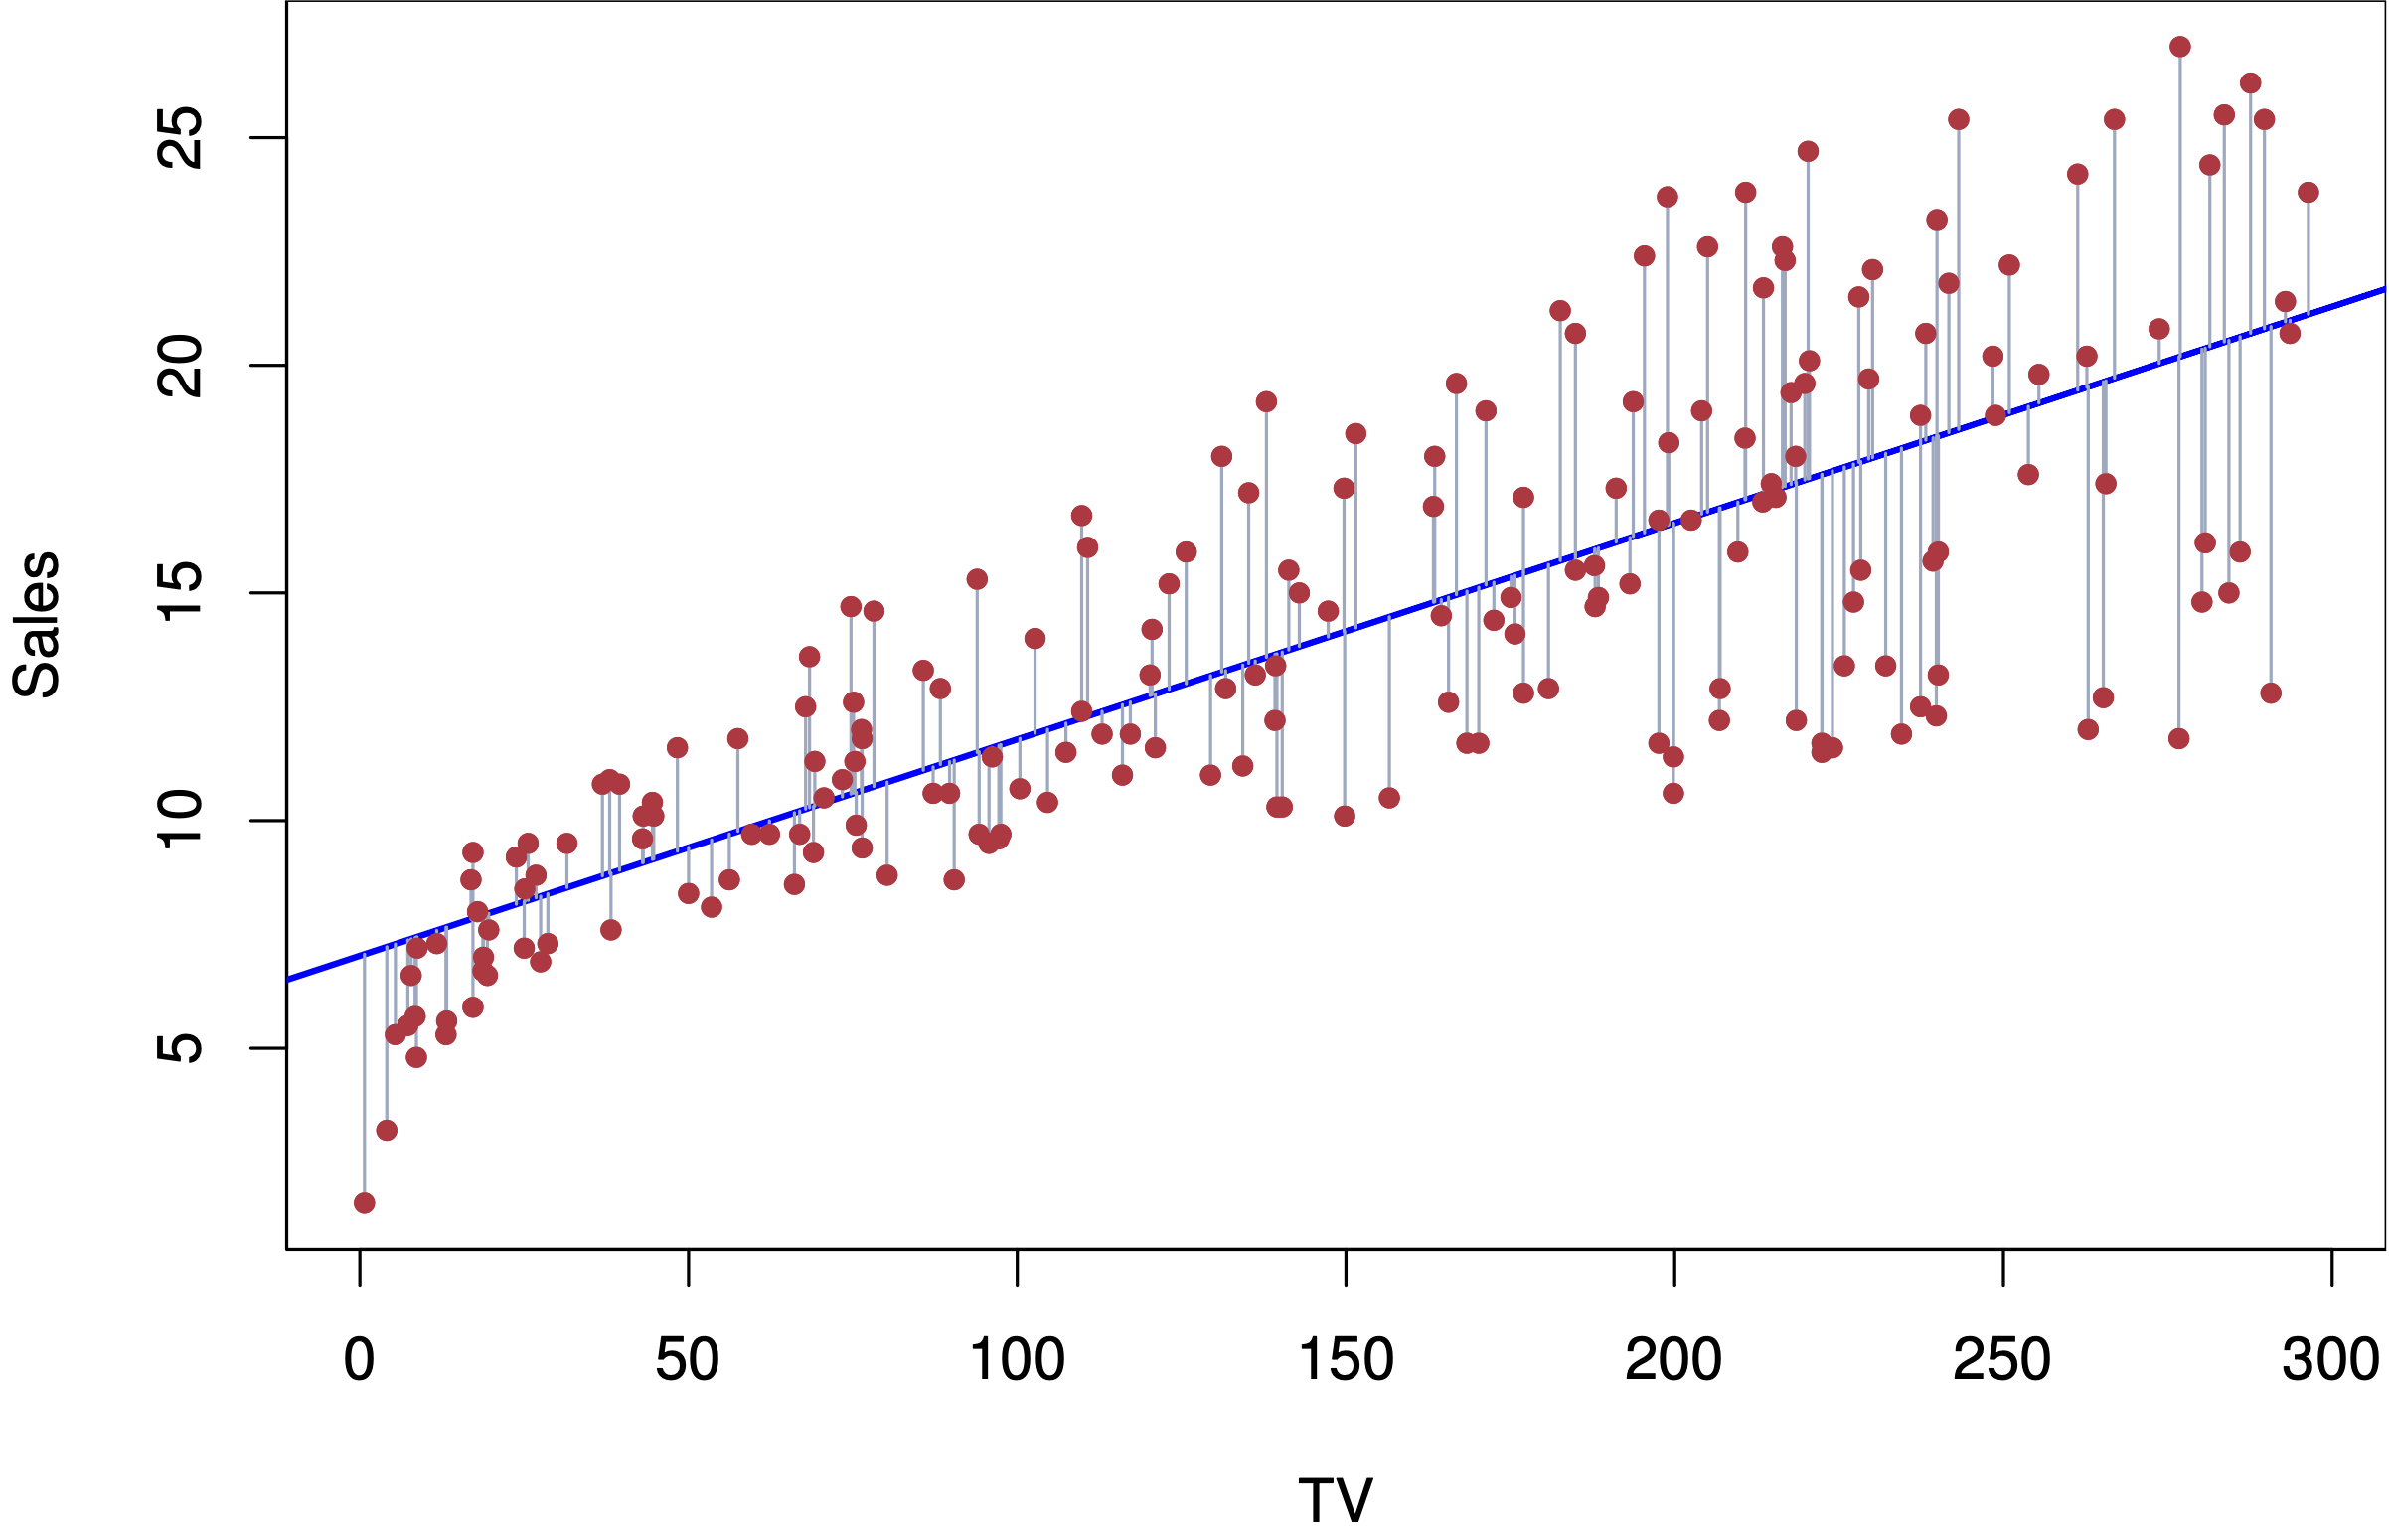

---



Note: Use the last 2 labs as resources for this lab 🆗

## Step 1: Define the Problem
The **NO2** dataset contains 500 measurement of pollution caused by cars. **The goal is to predict** the concentration of no2 from data about traffic and atmospheric conditions. The predictive variables include the number of cars per hour, temperature, wind, and time of day.

## Step 2: Collect Data

In [ ]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=267c6100569910260ac5bdadc321e169619d2b0815cdd53e9ebce223ad596524
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm
import sys
import os


In [ ]:
# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Hiding all warnings. Not recommended, just for compilation.
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [ ]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute);
attribute_names = list(X)

### **Question**: We said that the dataset, using Scikit-learn, can be imported from multiple options such as small dataset loading (toy data), data fetchers, and synthetic data generation. Which option is this one?

Your Answer: Data Loader

## Step 3: Exploratory Data Analysis
Understand the data

We can use pandas to quickly visualize the data. If you are new to pandas, take some time to understand the code.

We’ll remove the ‘day’ feature to focus on the non-temporal aspects of this interaction. We are not aiming to predict future levels, and even if we would it would require special treatment (e.g. different train-test splits). There also doesn’t seem to be a long term trend in the data, even though there are clear periodic trends in temperature.

In [ ]:
df = pd.DataFrame(X, columns=attribute_names).join(pd.DataFrame(list(y),columns=['target']))
df = df.sort_values(['day','hour_of_day']).drop('day',axis=1)
df.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
42,7.64300,8.5,4.3,-0.2,322.0,13,3.22287
20,7.75061,8.2,4.5,0.2,307.0,14,3.15274
255,8.12415,5.2,2.8,0.3,209.0,8,4.19570
488,7.64108,6.7,2.3,-0.4,247.0,10,3.98155
94,8.31630,6.3,1.2,1.3,265.0,17,4.14155


### Question: What other Pandas techniques can you use to understand the data? Use 5 methods to explore your data.

In [ ]:
#1
df.describe()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.973342,0.847400,3.056000,0.149400,143.370400,12.382000,3.698368
std,1.087166,6.524636,1.784172,1.065237,86.510213,6.802693,0.750597
min,4.127130,-18.600000,0.300000,-5.400000,2.000000,1.000000,1.223780
25%,6.175842,-3.900000,1.675000,-0.200000,72.000000,6.000000,3.213862
50%,7.425360,1.100000,2.800000,0.000000,97.000000,12.500000,3.848020
75%,7.793175,4.900000,4.200000,0.600000,220.000000,18.000000,4.216930
max,8.348540,21.100000,9.900000,4.300000,359.000000,24.000000,6.395090


In [ ]:
#2
df.shape

(500, 7)

In [ ]:
#3
df.value_counts()

cars_per_hour  temperature_at_2m  wind_speed  temperature_diff_2m_25m  wind_direction  hour_of_day  target 
4.12713         2.5               5.6          0.3                     213.5           3            2.79728    1
7.68064         0.3               1.3          1.4                     221.8           19           4.47050    1
7.71244         7.5               1.8         -2.7                     273.9           12           4.23411    1
               -9.9               2.7          0.7                     78.0            21           4.19117    1
7.71065         15.8              3.7         -0.3                     136.4           16           3.54385    1
                                                                                                              ..
6.61740         6.5               4.1          0.0                     88.0            24           2.73437    1
                2.2               3.9          0.0                     67.0            6            3.39786    1
6.61607         0.1               0.4          2.0                     122.3           22           4.24850    1
6.60800         7.2               0.6          1.3                     191.4           24           3.92986    1
8.34854         2.7               7.7          0.1                     219.0           17           3.81551    1
Name: count, Length: 500, dtype: int64

In [ ]:
#4
df.size

3500

In [ ]:
#5
df.values

array([[  7.643  ,   8.5    ,   4.3    , ..., 322.     ,  13.     ,
          3.22287],
       [  7.75061,   8.2    ,   4.5    , ..., 307.     ,  14.     ,
          3.15274],
       [  8.12415,   5.2    ,   2.8    , ..., 209.     ,   8.     ,
          4.1957 ],
       ...,
       [  7.61283,  20.3    ,   4.2    , ..., 278.9    ,  10.     ,
          3.48431],
       [  7.76853,  21.1    ,   4.5    , ..., 285.1    ,  11.     ,
          2.89037],
       [  5.50939,  10.3    ,   2.2    , ...,  37.4    ,   4.     ,
          3.32863]])

## Quick Visualization

<ipython-input-11-f3dfd3bbc9fb>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


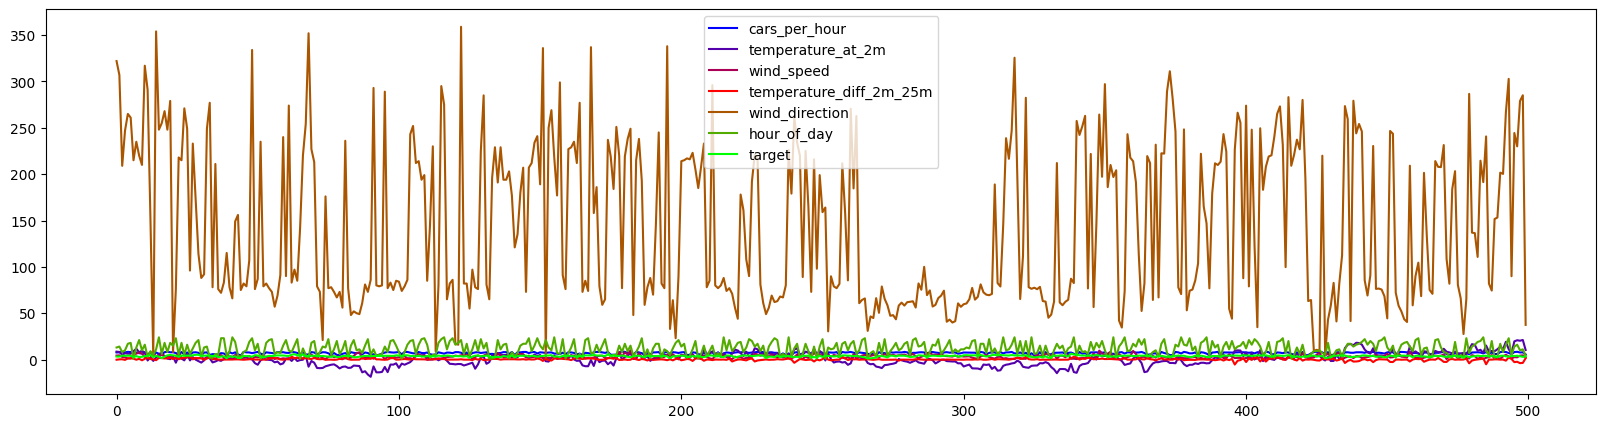

In [ ]:

df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));
X = X.drop('day',axis=1)

If we plot the data, ordered by time of measurement, we can see that the wind direction (measured in angular degrees) is scaled very differently from the other features. Let’s now zoom in to the other measures:



<ipython-input-12-ba153169720d>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


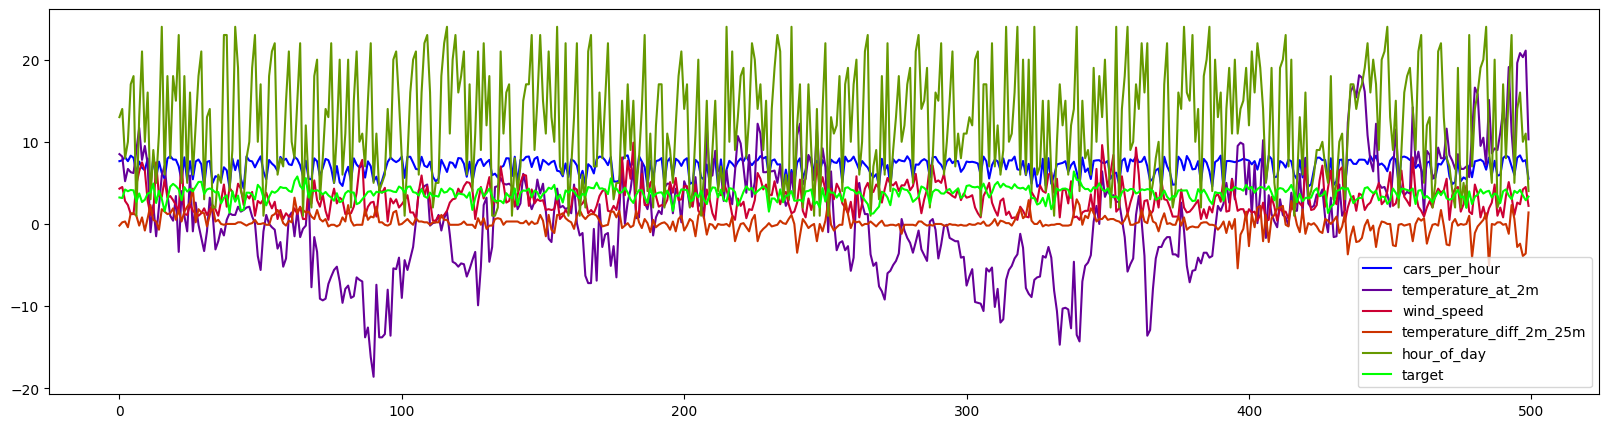

In [ ]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


We can see that the target (
 levels) seem to be correlated to the number of cars per hour, which makes sense because cars produce
. Other influences (air temperature differences and wind) seem to have a more complex and subtle effect. Let’s try to model these using linear regression models.

# Exercise 1: Model benchmark
It is clear that concentrations depend on a combination of these features, so we will now try to learn this complex relationship. We first evaluate a range of **linear regression models**, i.e. Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN. (check the last lab).

Since we observed that somf features have very different scales, we’ll also build pipelines of all these measures with an additional scaling step. For now, we’ll stick to the default hyperparameter settings.





In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.Ridge(alpha=.5)


X_train=df[['cars_per_hour','temperature_at_2m', 'temperature_diff_2m_25m', 'wind_direction','hour_of_day']]
Y_train=df['target']

X_test=df[['cars_per_hour','temperature_at_2m', 'temperature_diff_2m_25m', 'wind_direction','hour_of_day']]
Y_test=df['target']

reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3242357208080866


## Exercise 1.1
Implement 5 linear classifiers to predict the concentration of no2 from data  (predict and evaluate)

In [ ]:
# Classifier 1
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32423527141961145


In [ ]:
# Classifier 2
reg = linear_model.LassoLars(alpha=.1)
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.35642415128971755


In [ ]:
# Classifier 3
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32423706293952614


In [ ]:
# Classifier 4
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.35642306223028836


In [ ]:
# Classifier 5
reg = linear_model.BayesianRidge()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32430226483278324


In [ ]:
# Classifier 6
reg = linear_model.ElasticNetCV(alphas=np.logspace(-3, 3, 100), l1_ratio=[0.1, 0.5, 0.9], cv=5)
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32678624801889494


In [ ]:
# Classifier 7
reg = linear_model.TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3307483418463399


## Exercise 1.2
Implement a function below which fits each classifier passed into it on the given data, and then returns a list of the trained models.

In [ ]:
import numpy as np

def fit_classifiers_and_return_models(X_train, Y_train):
    classifiers = [
        linear_model.LinearRegression(),
        linear_model.LassoLars(),
        linear_model.RidgeCV(),
        linear_model.Lasso(),
        linear_model.BayesianRidge(),
        linear_model.ElasticNetCV(),
        linear_model.TweedieRegressor()
    ]

    trained_models = []

    # Loop over each classifier, fit, and store the trained model
    for clf in classifiers:
        clf.fit(X_train, Y_train)
        trained_models.append(clf)

    return trained_models

trained_models = fit_classifiers_and_return_models(X_train, Y_train)
print(trained_models)

[LinearRegression(), LassoLars(), RidgeCV(), Lasso(), BayesianRidge(), ElasticNetCV(), TweedieRegressor()]


## Exercise 1.3
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the test score of each model. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with standard Python built-ins. Below you the function you will find example output.

In [ ]:
def evaluate_learners(models, X_train, X_test, Y_train, Y_test):
    train_scores = []
    test_scores = []

    for model in models:
        model.fit(X_train, Y_train)
        train_scores.append(model.score(X_train, Y_train))  # Training score
        test_scores.append(model.score(X_test, Y_test))  # Test score

    return train_scores, test_scores


## Exercise 1.4
Call the function you created with a Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN. Store the return values in the variables train_scores and test_scores. Then, run the code given below to produce a plot visualizing the scores.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

train_scores, test_scores = evaluate_learners(models, X_train, X_test, Y_train, Y_test)

print("Training Scores:", train_scores)
print("Test Scores:", test_scores)

Training Scores: [0.4233444058526993, 0.42334121961704907, 0.03205923588694859, 0.10114826068034122, 0.4288464725030221]
Test Scores: [0.4233444058526993, 0.42334121961704907, 0.03205923588694859, 0.10114826068034122, 0.4288464725030221]


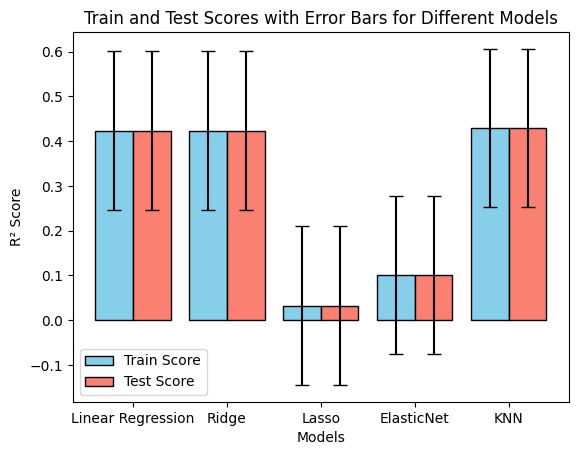

In [ ]:

model_names = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'KNN']
x_pos = np.arange(len(model_names))

# Calculate simple error bars (e.g., using standard deviation for simplicity)
train_errors = np.std(train_scores) * np.ones_like(train_scores)
test_errors = np.std(test_scores) * np.ones_like(test_scores)

# Plotting training and test scores with error bars
plt.bar(x_pos - 0.2, train_scores, 0.4, label='Train Score', yerr=train_errors, capsize=5, color='skyblue', edgecolor='black')
plt.bar(x_pos + 0.2, test_scores, 0.4, label='Test Score', yerr=test_errors, capsize=5, color='salmon', edgecolor='black')

# Adding labels and title
plt.xticks(x_pos, model_names)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Train and Test Scores with Error Bars for Different Models')
plt.legend()

## Exercise 1.5
Interpret the plot. Which is the best regressor?

Based on the plot, the best regressor appears to be ElasticNet. The ElasticNet model has the highest train and test scores, indicating it has the best performance on both the training and test data compared to the other models shown.